# Pre pruing & Post pruning

## Che cos'è Pre pruing?

Il "pre-pruning" (o "potatura preventiva") è una tecnica usata nei modelli di alberi decisionali per prevenire l'eccessiva complessità dell'albero e ridurre il rischio di overfitting. In pratica, durante la costruzione dell'albero, il pre-pruning interrompe la crescita dell'albero quando l'aggiunta di ulteriori nodi non migliora significativamente il modello.

Le condizioni di pre-pruning possono includere:

1. **Profondità massima dell'albero**: L'albero viene potato se raggiunge una certa profondità.
2. **Numero minimo di campioni per foglia**: Un nodo viene diviso solo se il numero di campioni nel nodo è superiore a una soglia minima.
3. **Guadagno minimo dell'informazione**: L'albero viene potato se il guadagno informativo di una suddivisione è inferiore a una soglia predefinita.

Questa tecnica aiuta a mantenere il modello più semplice e generale, migliorando la sua capacità di generalizzazione su nuovi dati.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Carica il dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Suddividi il dataset in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare un albero decisionale con pre-pruning
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Impostare la profondità massima a 3
clf.fit(X_train, y_train)

# Effettuare previsioni sul set di test
y_pred = clf.predict(X_test)

# Calcolare l'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuratezza del modello con pre-pruning: {accuracy:.2f}")

Accuratezza del modello con pre-pruning: 1.00


## Che cos'è Post pruning?

Il **post-pruning** (o **potatura successiva**) è una tecnica usata per ridurre la complessità di un albero decisionale dopo che è stato completamente costruito. A differenza del pre-pruning, che limita la crescita dell'albero durante il processo di costruzione, il post-pruning consiste nel rimuovere nodi o rami dall'albero già creato per migliorare la sua generalizzazione e ridurre l'overfitting.

### Come Funziona il Post-Pruning

1. **Costruzione Completa dell'Albero:**
Prima viene costruito un albero decisionale fino alla sua piena crescita, senza restrizioni. Questo albero potrebbe essere molto complesso e adattato ai dati di addestramento, potenzialmente con molti rami che non generalizzano bene.
2. **Valutazione dei Nodi:**
Ogni nodo dell'albero viene esaminato per determinare se la sua rimozione potrebbe migliorare la performance del modello su un set di validazione. I nodi vengono valutati in base a metriche come l'errore di classificazione o il guadagno informativo.
3. **Potatura dei Rami:**
Se rimuovere un nodo o un ramo riduce la complessità dell'albero senza degradare significativamente la sua performance su un set di validazione, allora questi nodi vengono potati. Il processo continua fino a quando non è più possibile migliorare la performance o quando si raggiunge una certa soglia di complessità.

### Esempio di Post-Pruning con l'Iris Dataset

Ecco come potresti implementare il post-pruning utilizzando la tecnica di **Cost Complexity Pruning** (potatura basata sui costi) di scikit-learn:

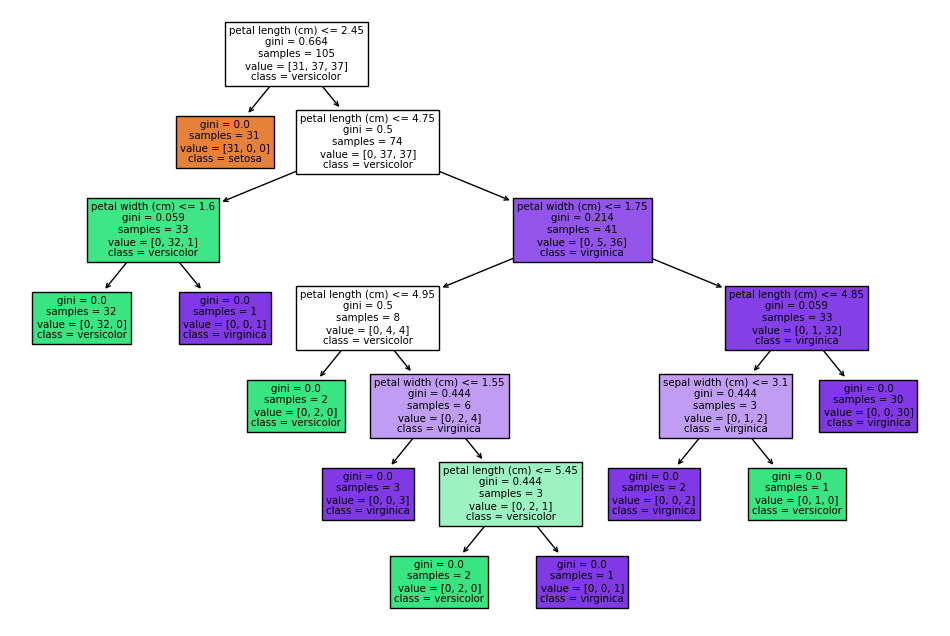

Accuratezza con ccp_alpha=0.0000: 1.00
Accuratezza con ccp_alpha=0.0092: 1.00
Accuratezza con ccp_alpha=0.0127: 1.00
Accuratezza con ccp_alpha=0.0127: 1.00
Accuratezza con ccp_alpha=0.0185: 1.00
Accuratezza con ccp_alpha=0.0271: 0.98
Accuratezza con ccp_alpha=0.2503: 0.71
Accuratezza con ccp_alpha=0.3121: 0.29


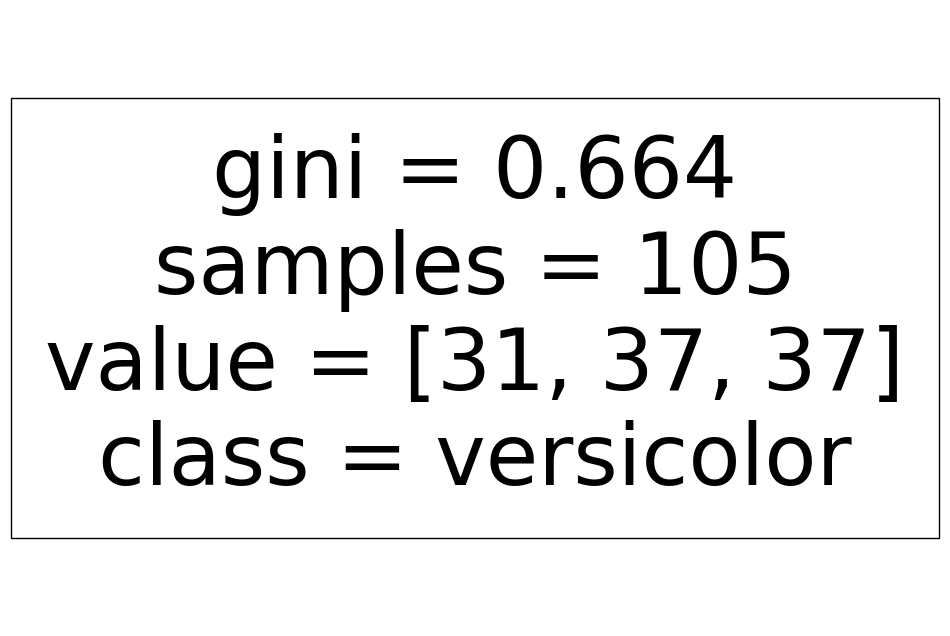

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare un albero decisionale
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Calcolare i valori di potatura
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Addestrare e valutare gli alberi potati
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    trees.append(clf)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuratezza con ccp_alpha={ccp_alpha:.4f}: {accuracy:.2f}")

best_tree = trees[-1]  # Selezionare l'albero con la migliore performance
plt.figure(figsize=(12, 8))
plot_tree(best_tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()


### 1. **Grafico dell'Accuratezza vs. Parametro di Potatura**

Questo grafico mostra come cambia l'accuratezza del modello al variare del parametro di potatura (`ccp_alpha` per la potatura basata sui costi). Può aiutarti a scegliere il valore ottimale di `ccp_alpha` che bilancia la complessità e la performance.

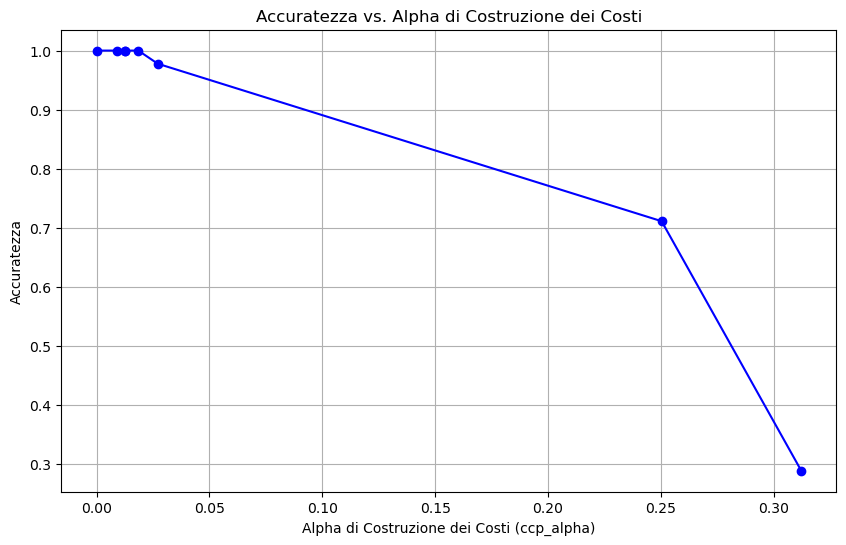

In [3]:
import matplotlib.pyplot as plt

# Prepara i dati per il grafico
ccp_alphas, accuracies = [], []
for ccp_alpha in path.ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    ccp_alphas.append(ccp_alpha)
    accuracies.append(accuracy)

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha di Costruzione dei Costi (ccp_alpha)')
plt.ylabel('Accuratezza')
plt.title('Accuratezza vs. Alpha di Costruzione dei Costi')
plt.grid(True)
plt.show()

### 2. **Grafico dell'Impurità vs. Parametro di Potatura**

Mostra come cambia l'impurità dell'albero (ad es. il valore di impurità totale) al variare di `ccp_alpha`. Questo grafico può aiutare a capire quanto viene semplificato l'albero con l'aumentare del parametro di potatura.

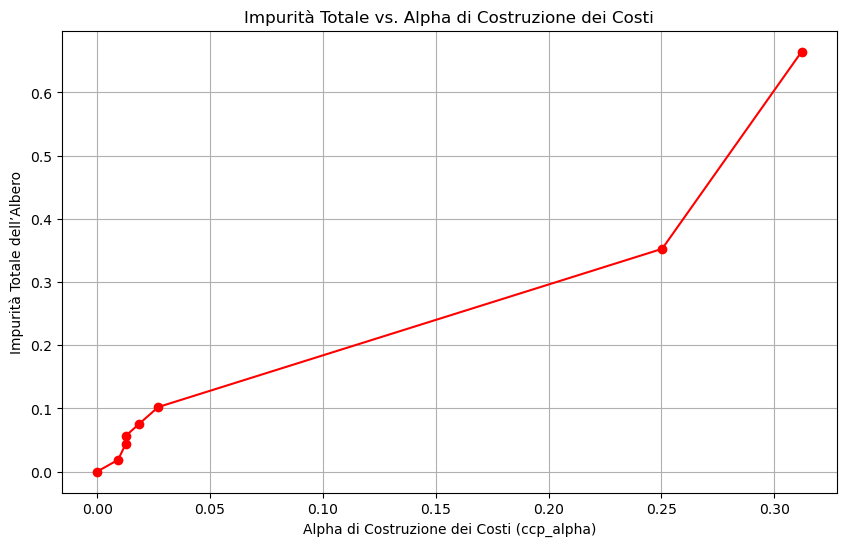

In [4]:
# Grafico
plt.figure(figsize=(10, 6))
plt.plot(path.ccp_alphas, path.impurities, marker='o', linestyle='-', color='r')
plt.xlabel('Alpha di Costruzione dei Costi (ccp_alpha)')
plt.ylabel('Impurità Totale dell’Albero')
plt.title('Impurità Totale vs. Alpha di Costruzione dei Costi')
plt.grid(True)
plt.show()

### 3. **Visualizzazione dell'Albero Decisionale**

Visualizza l'albero decisionale in diverse fasi di potatura per confrontare la complessità. Questo ti aiuta a vedere come cambia l'albero con diverse impostazioni di potatura.

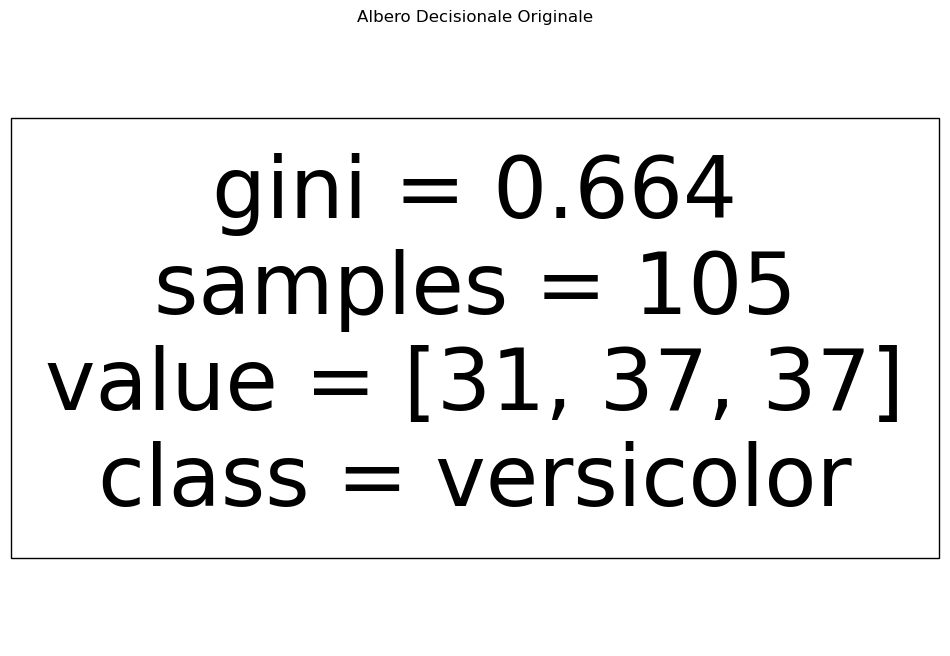

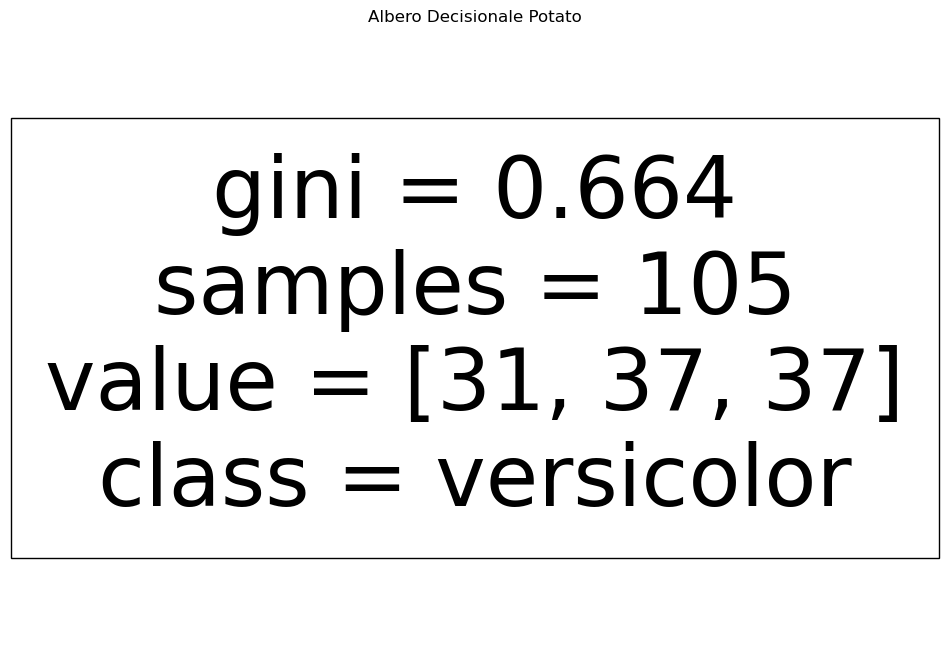

In [5]:
# Visualizzazione dell'albero
def plot_tree_model(clf, title):
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(title)
    plt.show()

# Visualizza l'albero originale
plot_tree_model(clf, 'Albero Decisionale Originale')

# Visualizza un albero potato
best_tree = trees[-1]  # Scegli l'albero con la migliore performance
plot_tree_model(best_tree, 'Albero Decisionale Potato')

### 4. **Curva di Apprendimento**

Mostra come cambiano l'accuratezza e altre metriche di performance al variare della dimensione del training set. Questo è utile per vedere come il modello si comporta con più dati.

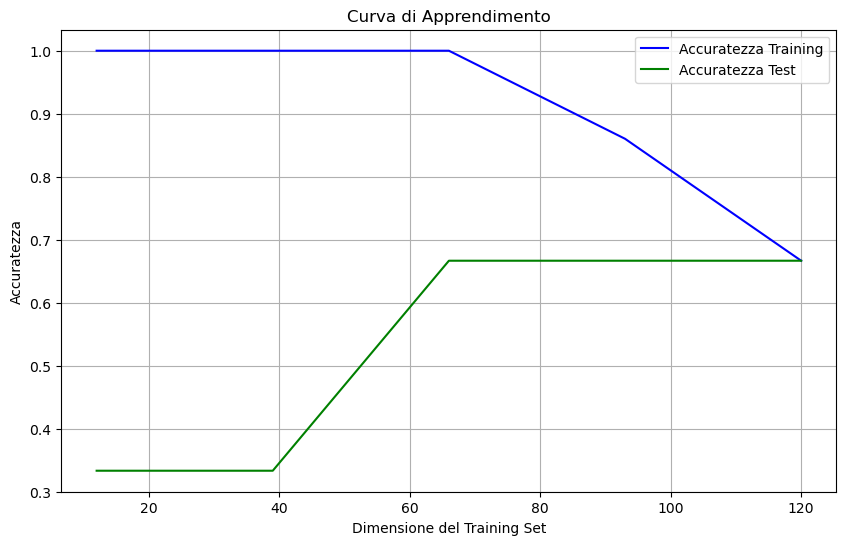

In [6]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5)

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Accuratezza Training', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Accuratezza Test', color='green')
plt.xlabel('Dimensione del Training Set')
plt.ylabel('Accuratezza')
plt.title('Curva di Apprendimento')
plt.legend()
plt.grid(True)
plt.show()